In [0]:
#IMPORTANDO BIBLIOTECAS

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
#Lendo o arquivo "mushoom"
cog = pd.read_csv('https://s3-sa-east-1.amazonaws.com/dados-leonardo/mushrooms.csv')

In [174]:
#Verificando os dados do dataset
cog.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


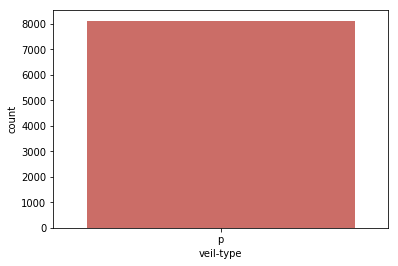

In [175]:
#EXPLORANDO AS VARIAVEIS
sb.countplot(x='veil-type',data=cog, palette='hls')

#DEPOIS DE EXPLORAR TODAS AS VARIAVEIS FOI VERIFICADO QUE "VEIL TYPE" TEM TODOS OS VALORES = P
#ESTA COLUNA SERÁ REMOVIDA, POIS NÃO AGREGA AO CLASSIFICADOR

In [0]:
#Removendo coluna "VEIL-TYPE" que não agrega para o classificador
cog = cog.drop(["veil-type"],axis=1)

In [177]:
#VERIFICANDO NULIDADE

cog.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [178]:
#OBTENDO INFORMAÇÕES SOBRE O DATASET
cog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [0]:
#OS DADOS DO DATASET SÃO CATEGÓRICOS - REALIZA A CONVERSÃO PARA DADOS NUMÉRICOS

labelencoder = LabelEncoder()

for i in cog.columns:
    cog[i] = labelencoder.fit_transform(cog[i])

In [180]:
#DESCREVENDO O DATASET APÓS CONVERSÃO DOS DADOS CATEGÓRICOS
cog.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,...,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00
mean,0.48,3.35,1.83,4.50,0.42,4.14,0.97,0.16,0.31,4.81,...,1.58,1.60,5.82,5.79,1.97,1.07,2.29,3.60,3.64,1.51
std,0.50,1.60,1.23,2.55,0.49,2.10,0.16,0.37,0.46,3.54,...,0.62,0.68,1.90,1.91,0.24,0.27,1.80,2.38,1.25,1.72
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,3.00,0.00,2.00,1.00,0.00,0.00,2.00,...,1.00,1.00,6.00,6.00,2.00,1.00,0.00,2.00,3.00,0.00
50%,0.00,3.00,2.00,4.00,0.00,5.00,1.00,0.00,0.00,5.00,...,2.00,2.00,7.00,7.00,2.00,1.00,2.00,3.00,4.00,1.00
75%,1.00,5.00,3.00,8.00,1.00,5.00,1.00,0.00,1.00,7.00,...,2.00,2.00,7.00,7.00,2.00,1.00,4.00,7.00,4.00,2.00
max,1.00,5.00,3.00,9.00,1.00,8.00,1.00,1.00,1.00,11.00,...,3.00,3.00,8.00,8.00,3.00,2.00,4.00,8.00,5.00,6.00


In [181]:
#OBTENDO INFORMAÇÕES DO DATASET APÓS CONVERSÃO DOS DADOS CATEGÓRICOS
cog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8

In [182]:
#VERIFICANDO DADOS DO DATASET APÓS CONVERSÃO DOS DADOS CATEGÓRICOS
cog.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


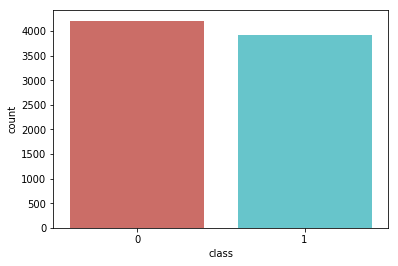

In [184]:
#Verificando o balanceamento dos dados (LABEL DE SAIDA)

sb.countplot(x='class',data=cog, palette='hls')

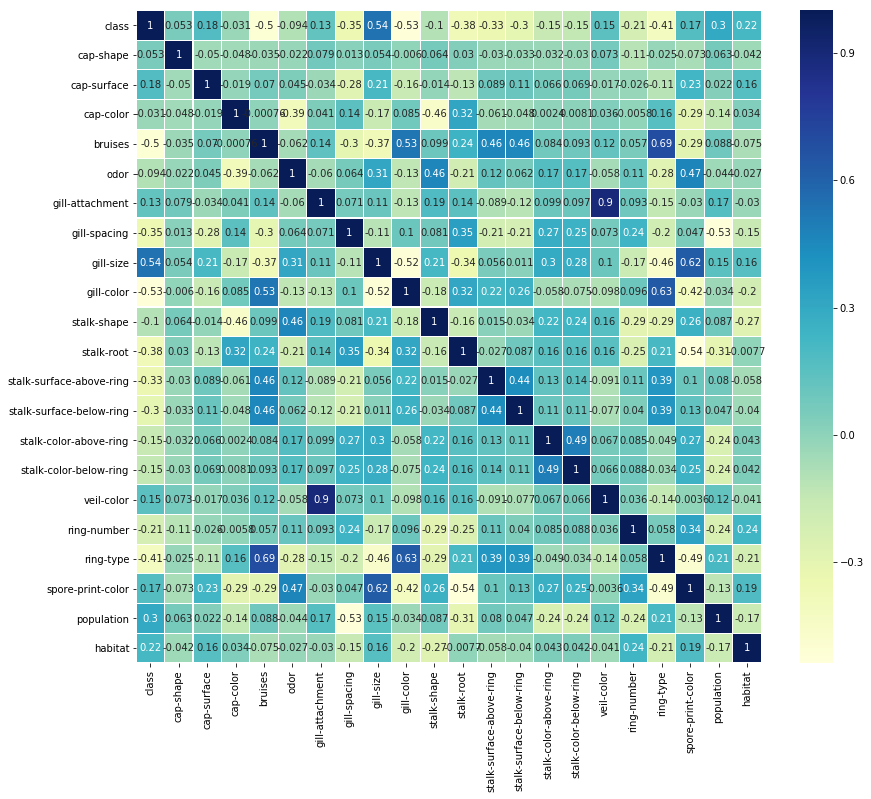

In [185]:
#Correlação dos dados
plt.figure(figsize=(14,12))
sb.heatmap(cog.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#GILL COLOR TEM A MENOR CORRELAÇÃO.

In [0]:
#Separando features e rótulo de saída

X = cog.drop(['class'], axis=1)
y = cog['class']

In [0]:
#Separando os dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [188]:
#Predict com Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

#Métricas

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1261
           1       0.93      0.92      0.92      1177

   micro avg       0.93      0.93      0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

0.92616899097621


Text(0.5, 15.0, 'Predicted label')

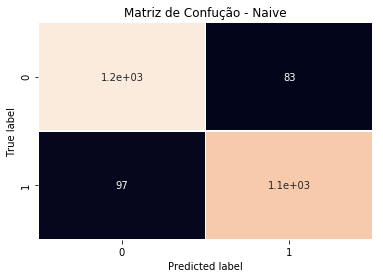

In [191]:
sb.heatmap(cm, annot = True,  linewidths=.5, cbar =None)
plt.title('Matriz de Confução - Naive')
plt.ylabel('True label')
plt.xlabel('Predicted label')


# CLASSIFICOU 1.178 COMO "0-COMESTÍVEL" DE FORMA CORRETA
# CLASSIFICOU 83 COMO "1-VENENOSO", PORÉM ERAM "0-COMESTÍVEL"

#CLASSIFICOU 1.080 COMO "1-VENENOSO" E REALMENTE ERAM VENENOSOS
#CLASSIFICOU 97 COMO "0-NÃO VENENOSO", PORÉM ERAM 


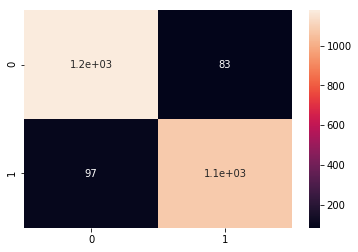

In [192]:
sb.heatmap(cm, annot=True)

In [193]:
cm

array([[1178,   83],
       [  97, 1080]])